## Cherilyn Conner
### Assignment 4

### 08/03/2019

In [50]:
%pwd

'C:\\Users\\Cherilyn\\Google Drive\\School\\summer\\Financial Models'

## Libraries

In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use ('ggplot')
from sklearn import linear_model
from sklearn.cluster import KMeans
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
#pip install kmodes
#pip install --upgrade kmodes
from kmodes.kmodes import KModes

In [52]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

## Reading in and cleaning the data

In [53]:
data = pd.read_excel('Survey_clean.xlsx')

#to clean the column names
data.columns = data.columns.str.strip().str.replace(".","").str.replace("Unnamed: 1","Gender")

#to remove the row with the questions for analysis and to choose the desired questions
data = data.iloc[1:]
data = data[["IDo","Gender","Q2","Q9","Q12","Q14","Q15","Q30"]]

#to split IDo into seperate columns for desk and trader
data[['desk','trader']] = data.IDo.str.split("C",n=1,expand=True)

#to fix some of the desk names
data['desk'] = data['desk'].str.replace('S 10', 'S10').str.replace('S37b08T', 'S3').str.replace('S3 ', 'S3')

#to change the responses into a likert scale
data['Q2'] = data['Q2'].str.replace('Neither Agree nor Disagree', '3').str.replace('Strongly Disagree', '5').str.replace('Strongly Agree', '1').str.replace('Agree', '2').str.replace('Disagree', '4')
data['Q9'] = data['Q9'].str.replace('Neither Agree nor Disagree', '3').str.replace('Strongly Disagree', '5').str.replace('Strongly Agree', '1').str.replace('Agree', '2').str.replace('Disagree', '4')
data['Q12'] = data['Q12'].str.replace('Neither Agree nor Disagree', '3').str.replace('Strongly Disagree', '5').str.replace('Strongly Agree', '1').str.replace('Agree', '2').str.replace('Disagree', '4')
data['Q14'] = data['Q14'].str.replace('Neither Agree nor Disagree', '3').str.replace('Strongly Disagree', '5').str.replace('Strongly Agree', '1').str.replace('Agree', '2').str.replace('Disagree', '4')
data['Q15'] = data['Q15'].str.replace('Neither Agree nor Disagree', '3').str.replace('Strongly Disagree', '5').str.replace('Strongly Agree', '1').str.replace('Agree', '2').str.replace('Disagree', '4')
data['Q30'] = data['Q30'].str.replace('Yes', 'Y').str.replace('No', 'N')


#data

## Questions we chose

### Q2: I traded using all of the information provided to me at each stage

### Q9: I belive that I can improve on my net profits if I had more information even if I did not have any technological tools to analyze the information

### Q12: The source (Highly reputed like Wall Street Journal/ Bloomberg versus low/unknown reputation like Sun news) of information would impact my trading decisions

### Q14: The medium (news /blog /video/ tool based) of information impacted my trading decisions

### Q15: I believe that more stock specific information could have helped me to increase my net profits

### Q30: I have had prior experience in live trading stock /shares




In [54]:
data.describe(include="all")

,IDo,Gender,Q2,Q9,Q12,Q14,Q15,Q30,desk,trader
count,363,363,363,363,363,363,363,363,363,362
unique,349,2,5,5,5,5,5,2,10,235
top,S2C1008,M,2,2,2,2,2,N,S6,10b1
freq,2,193,110,167,203,179,212,289,52,5


## Histograms for the categorical data to see the distributions of answers for each question
### as well as counts of each bar to show the exact number for each of the bars

M    193
F    170
Name: Gender, dtype: int64

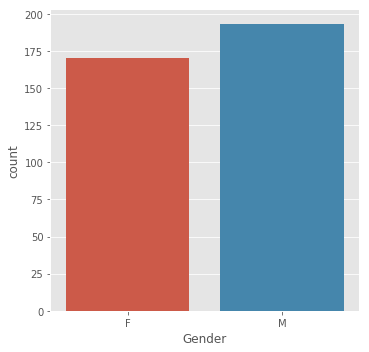

In [55]:
sns.catplot(x='Gender', kind='count', data=data);
#slightly more males than females; this surprises me I expected way more males

data['Gender'].value_counts()

2    110
3    104
4     83
1     40
5     26
Name: Q2, dtype: int64

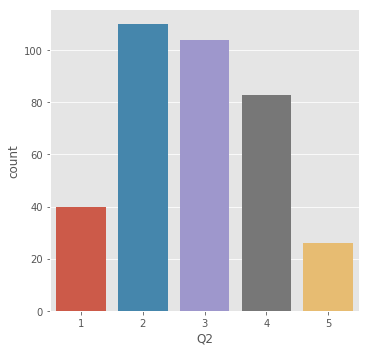

In [56]:
sns.catplot(x='Q2', kind='count', data=data);
#Mixed answers about whether the information provided was used when trading

data['Q2'].value_counts()

2    167
3     74
1     60
4     52
5     10
Name: Q9, dtype: int64

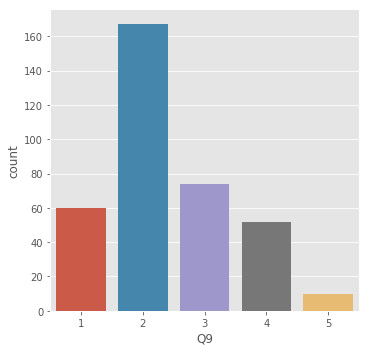

In [57]:
sns.catplot(x='Q9', kind='count', data=data);
#Most people agreed that they could have traded better if they were given more information
#this is interesting given the responses to the previous question where about 40% indicated that the used all of the information provided

data['Q9'].value_counts()

2    203
3     82
1     49
4     24
5      5
Name: Q12, dtype: int64

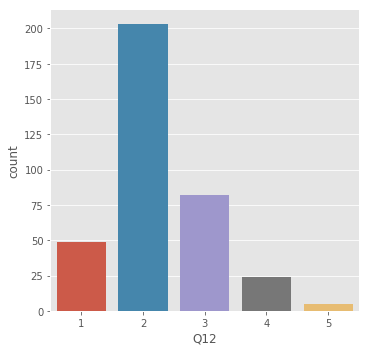

In [58]:
sns.catplot(x='Q12', kind='count', data=data);
#Most people agreed that the source of the information impacted their decision
#about 8% disagree or strongly disagree

data['Q12'].value_counts()

2    179
3     84
4     59
1     30
5     11
Name: Q14, dtype: int64

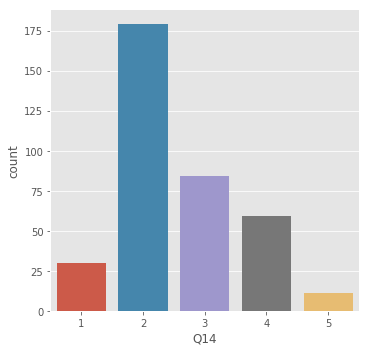

In [59]:
sns.catplot(x='Q14', kind='count', data=data);
#Most people agreed that the medium of the information impacted their decision
#about 19% disagree or strongly disagree

data['Q14'].value_counts()

2    212
1     85
3     49
4     13
5      4
Name: Q15, dtype: int64

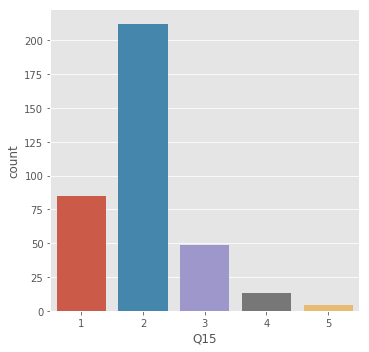

In [60]:
sns.catplot(x='Q15', kind='count', data=data);
#High amount of people beleive that more stock specific info could have imporved thier profits
# highest number of agrees and of strongly agrees
#only about 4.6% disagree or strongly disagree

data['Q15'].value_counts()

N    289
Y     74
Name: Q30, dtype: int64

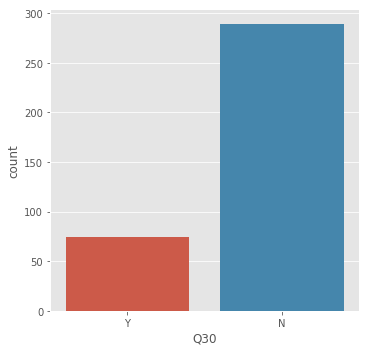

In [61]:
sns.catplot(x='Q30', kind='count', data=data);
#Much higher amount of people never had experience trading before
#almost 80%

data['Q30'].value_counts()

S6     52
S3     51
S5     50
S10    49
S7     47
S4     36
S9     29
S2     23
S1     14
S8     12
Name: desk, dtype: int64

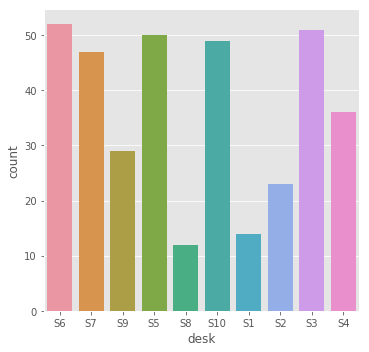

In [62]:
sns.catplot(x='desk', kind='count', data=data);
#varied number of transactions from each desk
#about half of the desks around 50
#2 desks less than 15

data['desk'].value_counts()

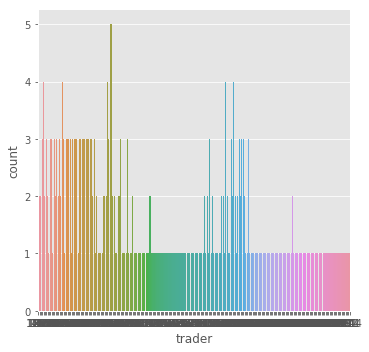

In [63]:
sns.catplot(x='trader', kind='count', data=data);
#most of the traders only have one unique data point with a few of them having multiple 

## Another set of histograms, this time breaking down the answers by desk
### also a chart of the number of people at each desk for each specific category

Gender   F   M
desk          
S1       9   5
S10     22  27
S2       8  15
S3      23  28
S4      17  19
S5      23  27
S6      29  23
S7      25  22
S8       2  10
S9      12  17


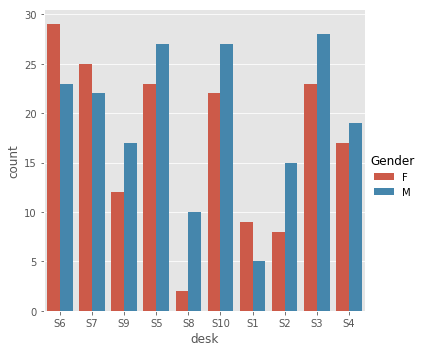

In [64]:
sns.catplot(x='desk', kind='count', hue='Gender', data=data);
#biggest gap between male and female at desk 8 and desk 2

print (pd.crosstab(data["desk"], data['Gender']));

Q2     1   2   3   4  5
desk                   
S1     1   2   4   6  1
S10    8  14  12  14  1
S2     2   7   7   6  1
S3     4  20  14  10  3
S4     1  12  13   9  1
S5     8  17   8  14  3
S6    10  15  15   3  9
S7     4  12  16  12  3
S8     1   4   2   2  3
S9     1   7  13   7  1


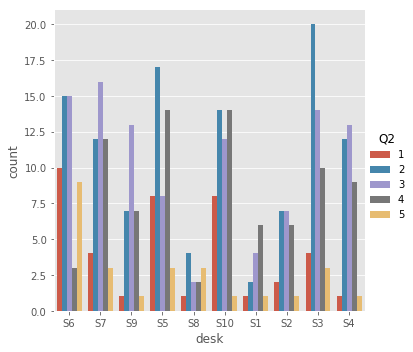

In [65]:
sns.catplot(x='desk', kind='count' ,hue='Q2', data=data);
#answers between desks vary

print (pd.crosstab(data["desk"], data['Q2']));

Q9     1   2   3   4  5
desk                   
S1     1   7   5   1  0
S10    7  21  11   9  1
S2     2  12   6   3  0
S3    10  26   4   9  2
S4     3  17  10   4  2
S5     8  21  10  10  1
S6    16  13  14   7  2
S7     7  27   7   5  1
S8     2   6   2   2  0
S9     4  17   5   2  1


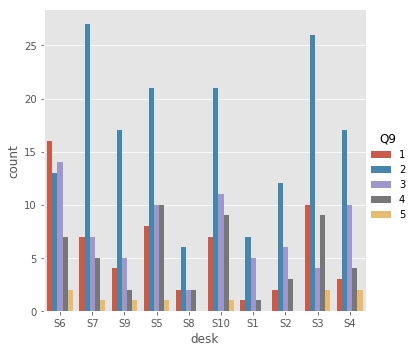

In [66]:
sns.catplot(x='desk', kind='count', hue='Q9', data=data);
#most desk have a high number of agree except for desk 6 which has the highest number of strongly agree

print (pd.crosstab(data["desk"], data['Q9']));

Q12    1   2   3  4  5
desk                  
S1     3   7   3  1  0
S10    6  30  10  2  1
S2     3  17   3  0  0
S3    10  31   9  1  0
S4    10  16   5  5  0
S5     4  36   9  0  1
S6     5  31  10  4  2
S7     4  20  16  6  1
S8     1   6   4  1  0
S9     3   9  13  4  0


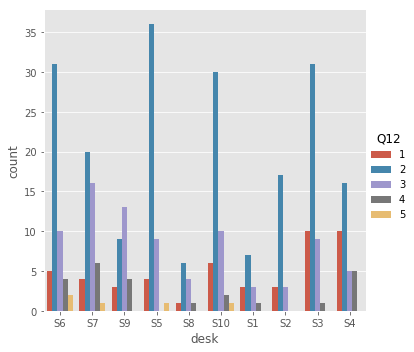

In [67]:
sns.catplot(x='desk', kind='count', hue='Q12', data=data);
#all desks have a high number of agree

print (pd.crosstab(data["desk"], data['Q12']));

Q14   1   2   3   4  5
desk                  
S1    2   8   2   2  0
S10   6  25  14   4  0
S2    1  14   5   3  0
S3    5  38   6   2  0
S4    5  22   8   1  0
S5    2  25  12  10  1
S6    3  17  14  13  5
S7    3  17  14  10  3
S8    1   4   2   4  1
S9    2   9   7  10  1


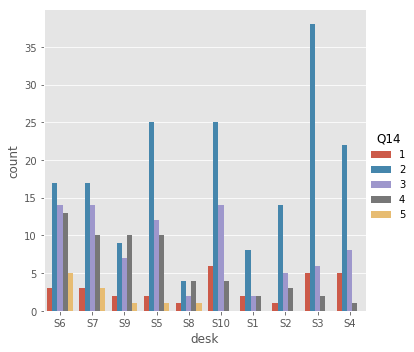

In [68]:
sns.catplot(x='desk', kind='count', hue='Q14', data=data);
#More variation in desks 6,7, and 9 with 9 having more disagree

print (pd.crosstab(data["desk"], data['Q14']));

Q15    1   2  3  4  5
desk                 
S1     3   8  1  2  0
S10   16  27  4  2  0
S2     3  17  2  1  0
S3    16  29  5  0  1
S4    11  19  4  2  0
S5     6  35  7  2  0
S6    16  25  8  1  2
S7     8  27  9  2  1
S8     2   6  3  1  0
S9     4  19  6  0  0


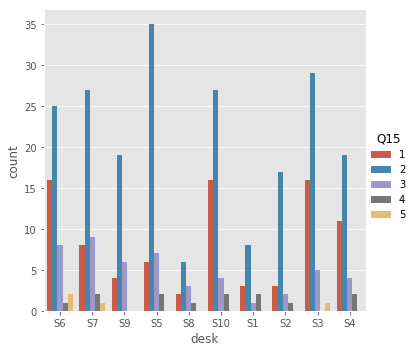

In [69]:
sns.catplot(x='desk', kind='count', hue='Q15', data=data);
#High amounts of agree at all desks, some desks with high disagree as well

print (pd.crosstab(data["desk"], data['Q15']));

Q30    N   Y
desk        
S1     8   6
S10   38  11
S2    18   5
S3    39  12
S4    31   5
S5    42   8
S6    41  11
S7    37  10
S8     9   3
S9    26   3


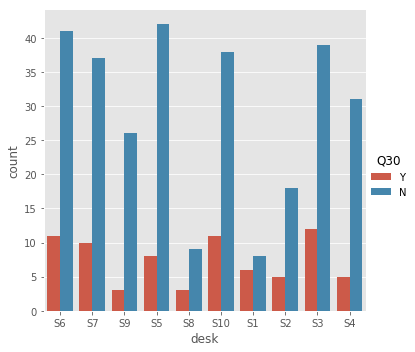

In [70]:
sns.catplot(x='desk', kind='count', hue='Q30', data=data);
#desk one showed closest amount of trading experience

print (pd.crosstab(data["desk"], data['Q30']));

## Looking in to differences in the answers between users who reported previous experience vs those who didn't
### Charts with the amount of users in each category and the percentage of users in each category are included

Gender    F    M
Q30             
N       128  161
Y        42   32
Gender         F         M
Q30                       
N       0.442907  0.557093
Y       0.567568  0.432432


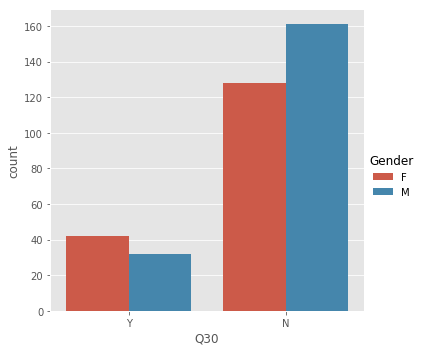

In [71]:
sns.catplot(x='Q30', kind='count', hue='Gender', data=data);
#more females had previous experience and more males didn't have previous experience

print (pd.crosstab(data["Q30"], data['Gender']));
print (pd.crosstab(data["Q30"], data['Gender'],normalize='index'));

Q2    1   2   3   4   5
Q30                    
N    29  82  86  72  20
Y    11  28  18  11   6
Q2          1         2         3         4         5
Q30                                                  
N    0.100346  0.283737  0.297578  0.249135  0.069204
Y    0.148649  0.378378  0.243243  0.148649  0.081081


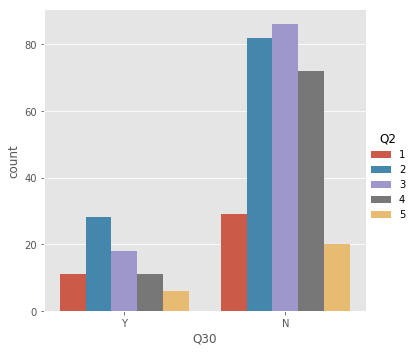

In [72]:
sns.catplot(x='Q30', kind='count', hue='Q2', data=data);
# higher % of yes used agreed with using all of the data
# higher percent of no disagreed with using all of the data

print (pd.crosstab(data["Q30"], data['Q2']));
print (pd.crosstab(data["Q30"], data['Q2'],normalize='index'));

Q9    1    2   3   4  5
Q30                    
N    46  133  59  43  8
Y    14   34  15   9  2
Q9          1         2         3         4         5
Q30                                                  
N    0.159170  0.460208  0.204152  0.148789  0.027682
Y    0.189189  0.459459  0.202703  0.121622  0.027027


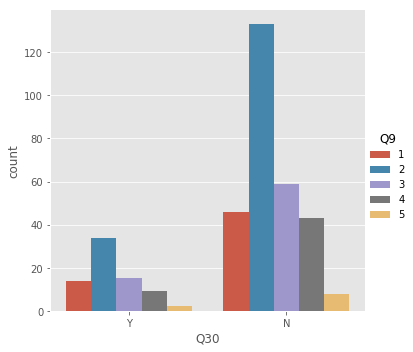

In [73]:
sns.catplot(x='Q30', kind='count', hue='Q9', data=data);
#most answers had same percentages only 3% higher for strongly agree for yes and 3% higher for disagree in no

print (pd.crosstab(data["Q30"], data['Q9']));
print (pd.crosstab(data["Q30"], data['Q9'],normalize='index'));

Q12   1    2   3   4  5
Q30                    
N    37  155  70  22  5
Y    12   48  12   2  0
Q12         1         2         3         4         5
Q30                                                  
N    0.128028  0.536332  0.242215  0.076125  0.017301
Y    0.162162  0.648649  0.162162  0.027027  0.000000


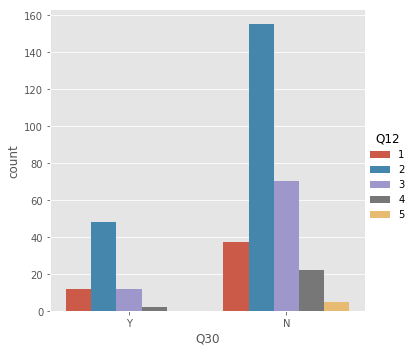

In [74]:
sns.catplot(x='Q30', kind='count', hue='Q12', data=data);
#yes group is over 10% higher than No group with agreeing that the source of the data was impactfull
#higher amount of indifference in the no group

print (pd.crosstab(data["Q30"], data['Q12']));
print (pd.crosstab(data["Q30"], data['Q12'],normalize='index'));

Q14   1    2   3   4   5
Q30                     
N    20  143  62  54  10
Y    10   36  22   5   1
Q14         1         2         3         4         5
Q30                                                  
N    0.069204  0.494810  0.214533  0.186851  0.034602
Y    0.135135  0.486486  0.297297  0.067568  0.013514


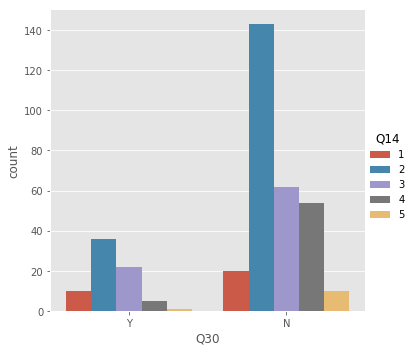

In [75]:
sns.catplot(x='Q30', kind='count', hue='Q14', data=data);
#higher amount of Yes either strongly agree or are neutral
#higher amount of NO disagree that the medium matters

print (pd.crosstab(data["Q30"], data['Q14']));
print (pd.crosstab(data["Q30"], data['Q14'],normalize='index'));

Q15   1    2   3  4  5
Q30                   
N    66  171  39  9  4
Y    19   41  10  4  0
Q15         1         2         3         4         5
Q30                                                  
N    0.228374  0.591696  0.134948  0.031142  0.013841
Y    0.256757  0.554054  0.135135  0.054054  0.000000


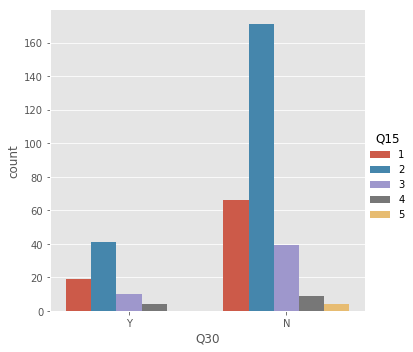

In [76]:
sns.catplot(x='Q30', kind='count', hue='Q15', data=data);
#distirbutions are close to equal

print (pd.crosstab(data["Q30"], data['Q15']));
print (pd.crosstab(data["Q30"], data['Q15'],normalize='index'));

## Looking in to differences in the answers between Males and Females
### Charts with the amount of users in each category and the percentage of users in each category are included

Q2       1   2   3   4   5
Gender                    
F       22  55  39  37  17
M       18  55  65  46   9
Q2             1         2         3         4         5
Gender                                                  
F       0.129412  0.323529  0.229412  0.217647  0.100000
M       0.093264  0.284974  0.336788  0.238342  0.046632


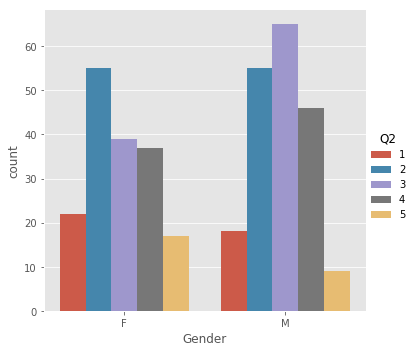

In [77]:
sns.catplot(x='Gender', kind='count', hue='Q2', data=data);
#higher % of females agreed with using all provided information
#higher % of males were neutral

print (pd.crosstab(data["Gender"], data['Q2']));
print (pd.crosstab(data["Gender"], data['Q2'],normalize='index'));

Q9       1   2   3   4  5
Gender                   
F       33  68  38  23  8
M       27  99  36  29  2
Q9             1         2         3         4         5
Gender                                                  
F       0.194118  0.400000  0.223529  0.135294  0.047059
M       0.139896  0.512953  0.186528  0.150259  0.010363


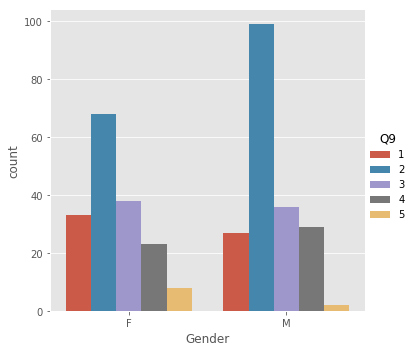

In [78]:
sns.catplot(x='Gender', kind='count', hue='Q9', data=data);
#higher % of females strongly agreed that more information would have helped
#but a higher % of males agreed and the total between strongly agree and agree was higher for males

print (pd.crosstab(data["Gender"], data['Q9']));
print (pd.crosstab(data["Gender"], data['Q9'],normalize='index'));

Q12      1    2   3   4  5
Gender                    
F       26   91  37  13  3
M       23  112  45  11  2
Q12            1         2         3         4         5
Gender                                                  
F       0.152941  0.535294  0.217647  0.076471  0.017647
M       0.119171  0.580311  0.233161  0.056995  0.010363


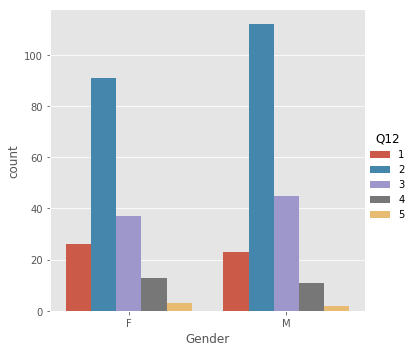

In [79]:
sns.catplot(x='Gender', kind='count', hue='Q12', data=data);
#higher % of females strongly agreed that source of information was impactful
#higher % of males agreed
#totals between stronly agree and agree were close to equal

print (pd.crosstab(data["Gender"], data['Q12']));
print (pd.crosstab(data["Gender"], data['Q12'],normalize='index'));

Q14      1   2   3   4  5
Gender                   
F       14  90  38  23  5
M       16  89  46  36  6
Q14            1         2         3         4         5
Gender                                                  
F       0.082353  0.529412  0.223529  0.135294  0.029412
M       0.082902  0.461140  0.238342  0.186528  0.031088


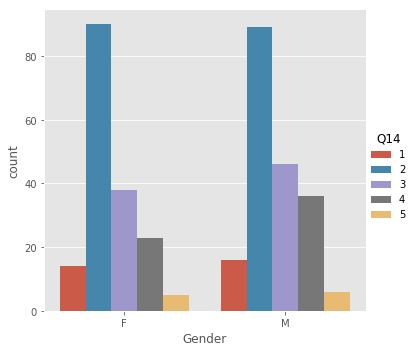

In [80]:
sns.catplot(x='Gender', kind='count', hue='Q14', data=data);
#higher % of females agreed that the medium of information was impactful
#higher % of males disagreed

print (pd.crosstab(data["Gender"], data['Q14']));
print (pd.crosstab(data["Gender"], data['Q14'],normalize='index'));

Q15      1    2   3  4  5
Gender                   
F       38  105  20  4  3
M       47  107  29  9  1
Q15            1         2         3         4         5
Gender                                                  
F       0.223529  0.617647  0.117647  0.023529  0.017647
M       0.243523  0.554404  0.150259  0.046632  0.005181


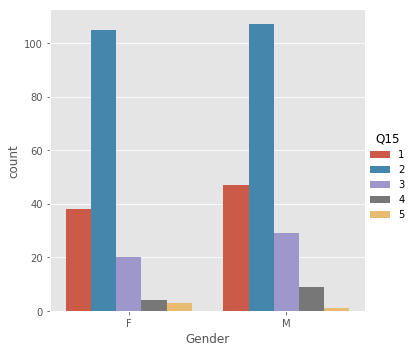

In [81]:
sns.catplot(x='Gender', kind='count', hue='Q15', data=data);
#higher % of females agreed that more stock specific information would ahve helped them
#higher % of males were neutral; slightly higher for strongly agree but over all agreeannce was below females

print (pd.crosstab(data["Gender"], data['Q15']));
print (pd.crosstab(data["Gender"], data['Q15'],normalize='index'));

# Clustering

## Created a new cdata set with out the srting colums of IDo, desk, and trader, and changed Q30 and Gender to Binary

In [95]:
cdata=data[["Gender","Q2","Q9","Q12","Q14","Q15","Q30"]]
cdata['Q30'] = cdata['Q30'].str.replace('Y', '0').str.replace('N', '1')
cdata['Gender'] = cdata['Gender'].str.replace('F', '0').str.replace('M', '1')

#cdata

C:\Users\Cherilyn\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Cherilyn\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


### trying out kmodes clustering 
#### I was able to get the Kmodes clustering to run but can not yet figure out how to get this one to show a graph
#### also every time I run it I get a different best run number and different centroids

In [96]:
km = KModes(n_clusters=4, init='Huang', n_init=5, verbose=1)

clusters = km.fit_predict(cdata)

print(km.cluster_centroids_)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 107, cost: 887.0
Run 1, iteration: 2/100, moves: 14, cost: 887.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 119, cost: 890.0
Run 2, iteration: 2/100, moves: 5, cost: 890.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 72, cost: 918.0
Run 3, iteration: 2/100, moves: 0, cost: 918.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 84, cost: 928.0
Run 4, iteration: 2/100, moves: 0, cost: 928.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 80, cost: 918.0
Run 5, iteration: 2/100, moves: 0, cost: 918.0
Best run was number 1
[['0' '2' '2' '2' '2' '2' '1']
 ['1' '3' '2' '3' '3' '3' '1']
 ['1' '4' '2' '2' '2' '2' '1']
 ['1' '

## Trying a different type of clustering

### This is showing up weird, I am not sure if that is because it is categorical data;
### It changes when I change the values in the brackets but I am not sure exactly what those values represent
### More research needed

[[0.45588235 2.44117647 3.75       1.85294118 1.95588235 1.70588235
  0.77941176]
 [0.52884615 3.625      1.82692308 2.00961538 2.125      1.80769231
  0.78846154]
 [0.53211009 1.75229358 1.89908257 2.19266055 2.64220183 1.85321101
  0.74311927]
 [0.59756098 3.65853659 2.70731707 3.02439024 3.52439024 2.70731707
  0.8902439 ]]


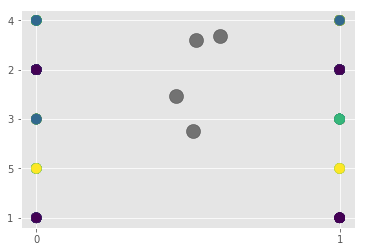

In [97]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(cdata)
print(kmeans.cluster_centers_)
y_km = kmeans.fit_predict(cdata)

plt.scatter(cdata.values[:, 0], cdata.values[:,1 ], c=y_km, s=100, cmap='viridis');

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

## Trying out a dendrogram

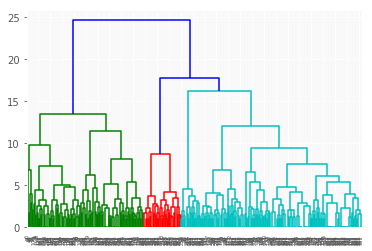

In [98]:
dendrogram = sch.dendrogram(sch.linkage(cdata, method='ward'))
#looks like the optimal number of clusters is 3
hc = AgglomerativeClustering(n_clusters=5, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(cdata)

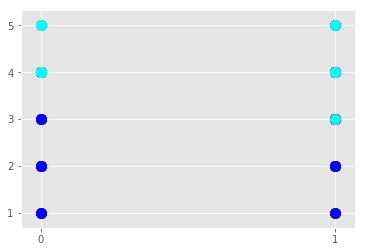

In [99]:
#building the cluster graph off of the dendrogram clusters
#not sure why it does not graph clusters of data points like expected

plt.scatter(cdata.values[y_hc ==0,0], cdata.values[y_hc == 0,1], s=100, c='red');
plt.scatter(cdata.values[y_hc==1,0], cdata.values[y_hc == 1,1], s=100, c='black');
plt.scatter(cdata.values[y_hc ==2,0], cdata.values[y_hc == 2,1], s=100, c='blue');
plt.scatter(cdata.values[y_hc ==3,0], cdata.values[y_hc == 3,1], s=100, c='cyan');

## Trying one last type of clustering
### All of the different methods are giving weird looking graphs, again not sure if this is because it is categorical

In [100]:
def doKmeans(cdata, nclust=2):
    model = KMeans(nclust)
    model.fit(cdata)
    clust_labels = model.predict(cdata)
    cent = model.cluster_centers_
    return (clust_labels, cent)

clust_labels, cent = doKmeans(cdata, 2)
kmeans = pd.DataFrame(clust_labels)
cdata.insert((cdata.shape[1]),'kmeans',kmeans)

Text(0.5, 1.0, 'K-Means Clustering')

Text(0.5, 0, 'Q2')

Text(0, 0.5, 'Q9')

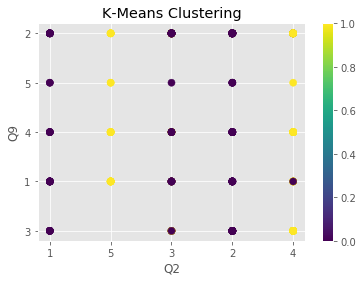

In [101]:
fig = plt.figure()
ax = fig.add_subplot(111)
scatter = ax.scatter(cdata['Q2'],cdata['Q9'],
                     c=kmeans[0],s=50)
ax.set_title('K-Means Clustering')
ax.set_xlabel('Q2')
ax.set_ylabel('Q9')
plt.colorbar(scatter)

Text(0.5, 1.0, 'K-Means Clustering')

Text(0.5, 0, 'Q2')

Text(0, 0.5, 'Q12')

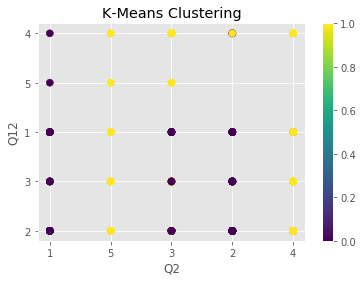

In [102]:
fig = plt.figure()
ax = fig.add_subplot(111)
scatter = ax.scatter(cdata['Q2'],cdata['Q12'],
                     c=kmeans[0],s=50)
ax.set_title('K-Means Clustering')
ax.set_xlabel('Q2')
ax.set_ylabel('Q12')
plt.colorbar(scatter)

Text(0.5, 1.0, 'K-Means Clustering')

Text(0.5, 0, 'Q30')

Text(0, 0.5, 'Q15')

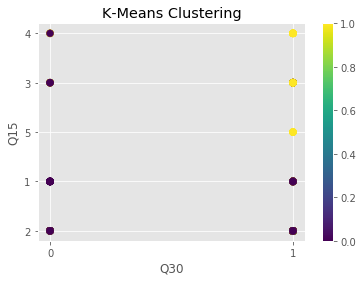

In [103]:
fig = plt.figure()
ax = fig.add_subplot(111)
scatter = ax.scatter(cdata['Q30'],cdata['Q15'],
                     c=kmeans[0],s=50)
ax.set_title('K-Means Clustering')
ax.set_xlabel('Q30')
ax.set_ylabel('Q15')
plt.colorbar(scatter)

Text(0.5, 1.0, 'K-Means Clustering')

Text(0.5, 0, 'Q14')

Text(0, 0.5, 'Q15')

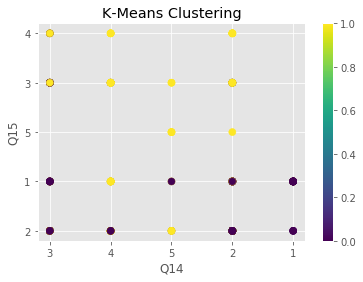

In [104]:
fig = plt.figure()
ax = fig.add_subplot(111)
scatter = ax.scatter(cdata['Q14'],cdata['Q15'],
                     c=kmeans[0],s=50)
ax.set_title('K-Means Clustering')
ax.set_xlabel('Q14')
ax.set_ylabel('Q15')
plt.colorbar(scatter)